## Guide to Experiment 2: Diodes

Métodos da Físcia Experimental I: (F540 2s2020)

* JupyterBook: Gustavo Wiederhecker
* Contributions: Daniel Ugarte, Antônio Riul Junior, Varlei Rodrigues

In this experiment, the role of diodes in electric circuits will be investigated. A diode is a nonlinear elementcomposed of a semiconductor junction with different doping of the *p* and *n* type, *a pn junction*. This junction allows the passage of a high current $ (\approx 1 A) $ when directly polarized and very low $ (\approx 10 ^ {- 5} A) $ when it is reverse polarized.

To fully appreciate this device, it is desirable that you read an introductory  text on the band theory of solids (Sections 3.1.1 to 3.1.4 in {cite}`eggleston2011basic`). Then, you should recap the method of load-lines to solve Kirchhoff's law when a diode is present, as section 3.2.1 in {cite}`eggleston2011basic`.

:::{admonition} Goals
:class: tip
-   Understand the behavior and simple applications of a diode in a circuit.

-   Build a DC voltage source using a diode as the rectifying element.

:::



:::{admonition} Items to include in your lab report
:class: warning
1. Graphs of Bode diagrams of the high-pass and low-pass filters. You must generate the graphs, based on the data provided in {ref}`sec:dataset1`.
2. In the same graph as the data, include the curves that represent fitting of the transfer functions. An example of this procedure in Python can be seen in {doc}`exemplo_ajuste_rc`
    * Make sure you can also estimate the asymptotic slopes of the ampitude plots, e.g., what is the filter roll-off in dB/decade? 
    * Based on on the intersection between the asymptotes, provide an estimate of the cut-off frequency of the filter. Estimate the RC constant of the filter based on your estimate, compare with your fitting results.
3. Use the FFT function in Python (or in a program of your choice) to calculate the Fourier transform of two-frequncies signal provided {ref}`sec:dataset2`.
     * The difference between the two signals is that the channel 2 signal was filtered by an RC circuit. Determine whether the circuit used was a high-pass or low-pass.
4. Provide hyperlinks to your TinkerCAD simulation and upload your QUCS file.
:::


In [1]:
#-----------------------------
#Pacote para manipular vetores e matrizes
import numpy as np
import pandas as pd
#-----------------------------
#Pacotes para lidar com unidades
from astropy import units as un
from astropy import constants as cte
#-----------------------------
#pacote para gráficos
import matplotlib.pyplot as plt
import matplotlib
#Comandos opcionais para formatar gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}	
lines = {'linewidth' : 3.0}
figure = {'figsize' : [6.0, 6/1.6]}
matplotlib.rc('font', **font)
matplotlib.rc('lines', **lines)
matplotlib.rc('figure', **figure)
#-----------------------------
from myst_nb import glue
#pacote para desenhar circuitos
import SchemDraw as schem
import SchemDraw.elements as e
d = schem.Drawing(unit=2.5) # unit=2.5 determina o tamanho dos componentes
# %config InlineBackend.figure_format = 'svg'

## Diode current-voltage curves (I-V curve)
Consider a circuit containing an element whose relationship between voltage and current is non-linear, for example, a diode. The diode case provides an important application of the load curve method mentioned above.
When breakdown(see section 3.1.5 in {cite}`eggleston2011basic`) effects are ignored, the current-voltage relation in a  diode is given by the Schockley equation,

$$I(V)=I_S (\exp\left(\frac{q V}{k_B T}\right)-1),$$ (eq:schockley)

where,
* $I_S$ [A] reverse saturation current ;
* $k_B\approx1.38\times10^{-23} $ [J/K] is the Boltzmann constant;
* $T $ [K] is the *pn* junction temperature;
* $q\approx1.6\times 10^{-19} $ [C] is the electron charge.

Note that $q/(k_B T)\approx39.6\equiv \beta $ [C/J] para $T=293$ [K], therefore $I(V)=I_S (\exp(\beta V)-1).$

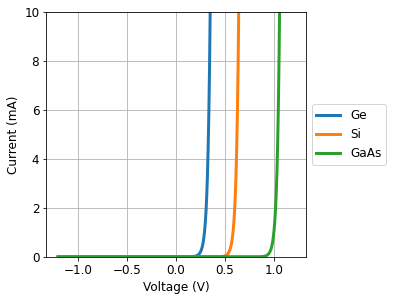

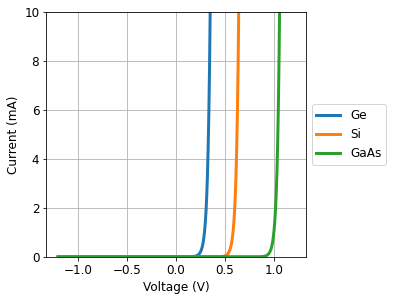

In [2]:
V=np.linspace(-1.2,1.2,1000) # vetor com tensões
#----------------------
β=39.6
Is_dict = {'Ge':1e-8,'Si':1e-13,'GaAs':7e-21} # dicionario contendo nome dos materias e valores de Is
fig, ax = plt.subplots(figsize=(4,4))
for material in Is_dict.keys():
    Id = Is_dict[material]*(np.exp(β*V)-1) # corrente no diodo
    #---
    plt.plot(V,Id*1e3, label = material)
    
#-----------------------
plt.ylim([0,10])
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')

plt.legend(loc = 'center left',bbox_to_anchor=[1.0,0.5])
plt.grid(True)
# plt.savefig('curva_IV_materiais.pdf',bbox_inches='tight')
glue("fig_diode_theory_iv_curve",fig,display=False)

Atributing typical values (REF) to $I_S$ for different materials,
* $I_S^\text{(Ge)}\approx 10^{-8} A$
* $I_S^\text{(Si)}\approx 10^{-13} A$
* $I_S^\text{(GaAs)}\approx 7\times 10^{-21} A$

```{glue:figure} fig_diode_theory_iv_curve
:figwidth: 400px
:name: fig:diode_theory_iv_curve
:align: center

Diode IV curves for distinct materials, according to {eq}`eq:schockley`.
```

## Rectification

The distribution of electrical energy worldwide is carried out by sine waves, with frequencies in the range of 50−100Hz and amplitudes between 100−300V (within a house). These amplitudes can be reduced by the use of a transformer, but the signal remains alternated, AC. Relative to the neutral wire, these signals exhibit a zero mean or DC value. 
Most electrical equipment, however, uses continuous power, DC. The transformation of an alternating voltage into continuous voltage is the most important and present application of diodes in our daily lives. The figure below represents the voltage output at the terminals of a transformer, similar to that used in the laboratory. Note that this signal has an average voltage value equal to zero ($<V(t)>=0$). Using a diode in a circuit assembly we can obtain a half-wave or full-wave rectification. The following figure shows the full-wave rectification, where the signal coming out of the transformer is rectified.

````{tabbed} Half-wave rectification
```{figure} figs/000_meia_onda_fig.png
---
width: 650px
name: "fig:half-wave_example"
---
Experimental trace of input (left) and half-wave rectified signal (right)
```
````
````{tabbed} Full-wave rectification
```{figure} figs/013_onda_completa_R_330_fig.png
---
width: 650px
name: "fig:full-wave_example"
---
Experimental trace of input (left) and full-wave rectified signal (right)
```
````

Despite the average DC value that appears in the rectified signals, either half-wave of full-wave rectification results in a large ripple (oscillation) of the output voltage.

### Filtered rectification

The simplest circuit to minimize the ripples observed in {ref}`fig:half-wave_example` or  {ref}`fig:full-wave_example` consists of coupling a capacitor to the load, which allows filtering of the ripples and, therefore,  minimizing the signal oscillation. The complete model for filter rectification implies an RC circuit, where the signal ripple (ripple voltage) can be expressed by (see section 3.2.3 in {cite}`eggleston2011basic`):

$$ V_{R}=\left(V_{0}-V_d\right)\left(1 - e^\frac{\Delta t_{d}}{RC} \right), $$(eq:diode_capacitor)

where $V_d\approx 0.7$ is the diode voltage drop, and $\Delta t_{d}$ is the time slot between two successive peaks, i.e., $\Delta t_{d}\approx T$ for half-wave rectifiers and $\Delta t_{d}\approx T/2$  for full-wave rectifiers.
When $RC>>\Delta t_{d}$, eq. {eq}`(eq:diode_capacitor)` can  be approximated by,

$$V_{R} = \frac{V_{0} \ \Delta t_{d} }{R C} = \frac{I_0}{(2 \ ou \ 1) fC}$$

with $I_0=\left(V_{0}-V_d\right)/R$ is the current that flows in the circuit (capacitor-less) circuit when the voltage is above the diode voltage ($\approx 0.7 V$).

## Rectified voltage sources

The half-wave rectifier is the simplest voltage source in existence, where only half a cycle of the alternating voltage wave is converted to continuous voltage. 
<!-- A resistência de décadas representa simplesmente qualquer dispositivo que fosse ligado nesse “eliminador de pilha simplificado”.

O sinal de tensão alternado na saída do transformador é retificado, i.e, apenas os valores de tensão positivos “passam” pelo diodo, cortando os valores negativos de tensão. Essa é uma retificação muito ruim, pois ainda tem muita oscilação no sinal retificado. -->

````{tabbed} Half-wave circuit
```{figure} figs/meia_onda_qucs_cap.png
---
width: 450px
name: "fig:half-wave_circuit_capacitor"
---
Schematic of a half-wave rectifier
```
````
````{tabbed} Full-wave circuit
```{figure} figs/completa_onda_qucs_cap.png
---
width: 450px
name: "fig:full-wave_circuit_capacitor"
---
Schematic of a full-wave rectifier
```
````

### Videos of the experiments
**You must login with you @m.unicamp.br account to view these videos!**

#### Half-wave rectifier
This first video illustrate the experimental procedure and data acquisition associated with the half-wave rectifier.

<iframe width="640" height="360" src="https://web.microsoftstream.com/embed/video/9b2693ab-c312-412c-80ed-e5d081240f6e?autoplay=false&amp;showinfo=true" allowfullscreen style="border:none;"></iframe>

#### Full-wave rectifier
This second video illustrate the experimental procedure and data acquisition associated with the half-wave rectifier.

<iframe width="640" height="360" src="https://web.microsoftstream.com/embed/video/f3763f6a-b335-489d-83a1-5dfd18b966ea?autoplay=false&amp;showinfo=true" allowfullscreen style="border:none;"></iframe>

(sec:dataset_diode)=
### Downloadable dataset 1
* Two files (.zip):
<!--     * [Low-pass circuit](https://github.com/gwiederhecker/F540_jbook/blob/2021_1s/guides/exp1/dados/passa-baixas.zip?raw=true)
    * [High-pass circuit](https://github.com/gwiederhecker/F540_jbook/blob/2021_1s/guides/exp1/dados/passa-altas.zip?raw=true)
        * Each `.zip` file contains:
         * `.jpg` file with a photo of the circuit
         * file `data_sweep.csv`: see an example of the structure of this file below.
         * 4 columns
         * the phase (column `phase (degrees)` corresponds to $ \phi = \phi_2- \phi_1 $)
         * folder `traces-temporal-images`:
             * files with the name `sweep_freq_xxx.bmp` correspond to the scope traces used to calculate each of the parameters of the file` data_sweep.csv`. The `xxx` numbering of the` .bmp` files corresponds to the index available in the first column of the `data_sweep.csv` file
             * Make sure that you can "read" the data from one of the `sweep_freq_xxx.bmp` files and get the corresponding result recorded in the` data_sweep.csv` file. -->


```{figure} figs/onda_completa.gif
---
width: 450px
name: "fig:full_wave_gif"
---
Full wave rectification filtering
```